In [24]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns

%matplotlib inline

In [25]:
df = pd.read_excel('../data/GDPPC_ENACC_ statewoDC_total_10_20.xlsx')

In [26]:
df.head(10)

,STATE,ST_AB,YEAR,GDP,POP_EST,GDPPC,DoD_TOT_ENACC,DoD_TOT_ENACC_PER
0,Alabama,AL,2010,1.772492e+11,4785514,37038.696366,3029,1.90
1,Alaska,AK,2010,5.333160e+10,713982,74696.000740,412,0.26
2,Arizona,AZ,2010,2.511530e+11,6407342,39197.689151,3840,2.50
3,Arkansas,AR,2010,1.014865e+11,2921998,34731.885511,1522,1.00
4,California,CA,2010,1.954093e+12,37319550,52361.100281,17386,11.10
5,Colorado,CO,2010,2.583002e+11,5047539,51173.492666,2961,1.90
6,Connecticut,CT,2010,2.347000e+11,3579173,65573.807134,1174,0.75
7,Delaware,DE,2010,5.816350e+10,899647,64651.468854,381,0.24
8,Florida,FL,2010,7.469289e+11,18846143,39632.984850,11690,7.50
9,Georgia,GA,2010,4.180913e+11,9712209,43048.013073,6721,4.30


In [27]:
df[df['YEAR'] == 2010]

,STATE,ST_AB,YEAR,GDP,POP_EST,GDPPC,DoD_TOT_ENACC,DoD_TOT_ENACC_PER
0,Alabama,AL,2010,1.772492e+11,4785514,37038.696366,3029,1.90
1,Alaska,AK,2010,5.333160e+10,713982,74696.000740,412,0.26
2,Arizona,AZ,2010,2.511530e+11,6407342,39197.689151,3840,2.50
3,Arkansas,AR,2010,1.014865e+11,2921998,34731.885511,1522,1.00
4,California,CA,2010,1.954093e+12,37319550,52361.100281,17386,11.10
5,Colorado,CO,2010,2.583002e+11,5047539,51173.492666,2961,1.90
6,Connecticut,CT,2010,2.347000e+11,3579173,65573.807134,1174,0.75
7,Delaware,DE,2010,5.816350e+10,899647,64651.468854,381,0.24
8,Florida,FL,2010,7.469289e+11,18846143,39632.984850,11690,7.50
9,Georgia,GA,2010,4.180913e+11,9712209,43048.013073,6721,4.30


In [28]:
df[df['YEAR'] == 2010]

,STATE,ST_AB,YEAR,GDP,POP_EST,GDPPC,DoD_TOT_ENACC,DoD_TOT_ENACC_PER
0,Alabama,AL,2010,1.772492e+11,4785514,37038.696366,3029,1.90
1,Alaska,AK,2010,5.333160e+10,713982,74696.000740,412,0.26
2,Arizona,AZ,2010,2.511530e+11,6407342,39197.689151,3840,2.50
3,Arkansas,AR,2010,1.014865e+11,2921998,34731.885511,1522,1.00
4,California,CA,2010,1.954093e+12,37319550,52361.100281,17386,11.10
5,Colorado,CO,2010,2.583002e+11,5047539,51173.492666,2961,1.90
6,Connecticut,CT,2010,2.347000e+11,3579173,65573.807134,1174,0.75
7,Delaware,DE,2010,5.816350e+10,899647,64651.468854,381,0.24
8,Florida,FL,2010,7.469289e+11,18846143,39632.984850,11690,7.50
9,Georgia,GA,2010,4.180913e+11,9712209,43048.013073,6721,4.30


In [29]:
df_2010 = df[df['YEAR'] == 2010]
df_2010.head(2)

,STATE,ST_AB,YEAR,GDP,POP_EST,GDPPC,DoD_TOT_ENACC,DoD_TOT_ENACC_PER
0,Alabama,AL,2010,1.772492e+11,4785514,37038.696366,3029,1.90
1,Alaska,AK,2010,5.333160e+10,713982,74696.000740,412,0.26


In [30]:
df_2010.describe()

,YEAR,GDP,POP_EST,GDPPC,DoD_TOT_ENACC,DoD_TOT_ENACC_PER
count,50.0,5.000000e+01,5.000000e+01,50.000000,50.00000,50.000000
mean,2010.0,2.967782e+11,6.174437e+06,47197.235078,3123.74000,2.000800
std,0.0,3.578604e+11,6.862403e+06,9237.559035,3555.93063,2.271562
min,2010.0,2.740660e+10,5.645310e+05,31624.124971,208.00000,0.130000
25%,2010.0,7.130755e+10,1.835760e+06,40664.988512,963.50000,0.620000
50%,2010.0,1.718290e+11,4.446550e+06,45597.230364,2052.50000,1.300000
75%,2010.0,3.839067e+11,6.698867e+06,51832.669442,3584.00000,2.300000
max,2010.0,1.954093e+12,3.731955e+07,74696.000740,17386.00000,11.100000


In [31]:
#The aveage GDPPC in 2010 without DC in the US was approximately $47,197, $2K less than 2010 with DC included.

<Axes: xlabel='YEAR', ylabel='GDPPC'>

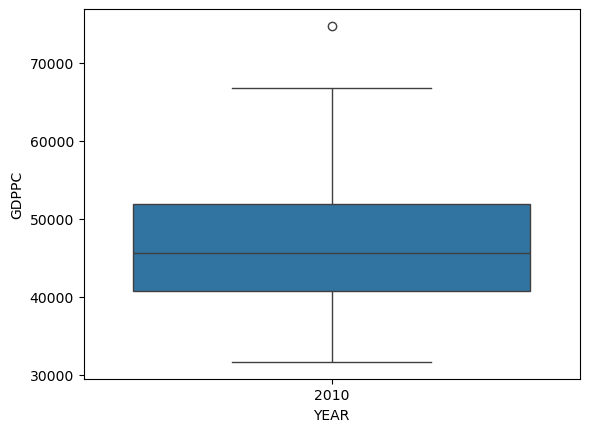

In [32]:
sns.boxplot(x=df_2010['YEAR'], y=df_2010['GDPPC'])

<Axes: xlabel='YEAR', ylabel='GDPPC'>

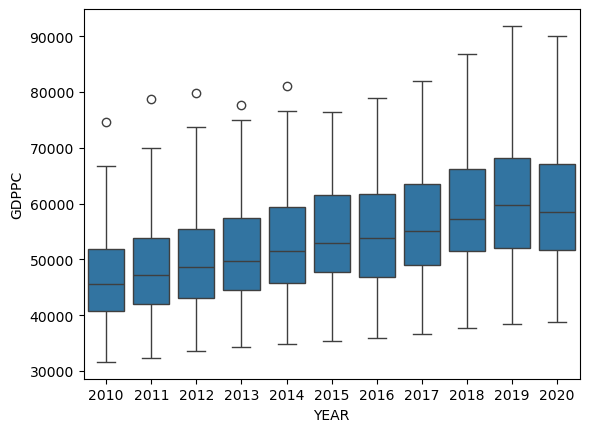

In [33]:
sns.boxplot(x=df['YEAR'], y=df['GDPPC'])

In [34]:
df_2010_gdppc_ordered = df_2010.sort_values('GDPPC', ascending=False)

In [35]:
df_2010_gdppc_ordered.head(10)

,STATE,ST_AB,YEAR,GDP,POP_EST,GDPPC,DoD_TOT_ENACC,DoD_TOT_ENACC_PER
1,Alaska,AK,2010,5.333160e+10,713982,74696.000740,412,0.26
49,Wyoming,WY,2010,3.768070e+10,564531,66746.910267,399,0.26
6,Connecticut,CT,2010,2.347000e+11,3579173,65573.807134,1174,0.75
7,Delaware,DE,2010,5.816350e+10,899647,64651.468854,381,0.24
31,New York,NY,2010,1.223530e+12,19399956,63068.684279,6464,4.10
20,Massachusetts,MA,2010,4.111361e+11,6566440,62611.719592,2131,1.40
29,New Jersey,NJ,2010,4.927624e+11,8799451,55999.220860,2927,1.90
19,Maryland,MD,2010,3.147283e+11,5788784,54368.637697,2702,1.70
46,Washington,WA,2010,3.654978e+11,6743009,54203.961466,3591,2.30
45,Virginia,VA,2010,4.269924e+11,8024004,53214.380252,4907,3.10


C:\Users\hargr\AppData\Local\Temp\ipykernel_10884\641633345.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ST_AB', y='GDPPC', data=df_2010_gdppc_ordered, palette='coolwarm')


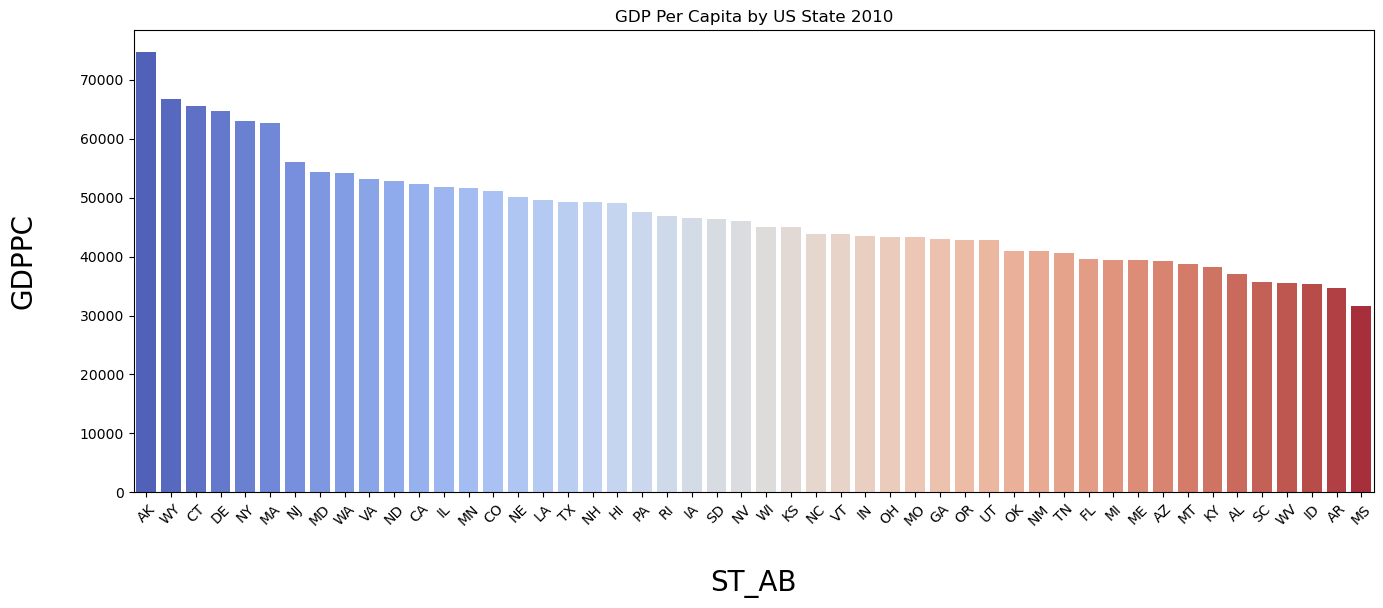

In [36]:
fig, ax = plt.subplots(figsize=(16, 6))
df_2010_gdppc_ordered = df_2010.sort_values('GDPPC', ascending=False)
#mean = pd.DataFrame({'ST_AB':['US mean'], 'GDPPC
sns.barplot(x='ST_AB', y='GDPPC', data=df_2010_gdppc_ordered, palette='coolwarm')
ax.set_xlabel(ax.get_xlabel(), labelpad=30)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
plt.title('GDP Per Capita by US State 2010')
plt.xticks(rotation = 45)   
plt.show()

In [37]:
df_2010.head(2)

,STATE,ST_AB,YEAR,GDP,POP_EST,GDPPC,DoD_TOT_ENACC,DoD_TOT_ENACC_PER
0,Alabama,AL,2010,1.772492e+11,4785514,37038.696366,3029,1.90
1,Alaska,AK,2010,5.333160e+10,713982,74696.000740,412,0.26


In [38]:
df_2010_gdppc_ordered.head()

,STATE,ST_AB,YEAR,GDP,POP_EST,GDPPC,DoD_TOT_ENACC,DoD_TOT_ENACC_PER
1,Alaska,AK,2010,5.333160e+10,713982,74696.000740,412,0.26
49,Wyoming,WY,2010,3.768070e+10,564531,66746.910267,399,0.26
6,Connecticut,CT,2010,2.347000e+11,3579173,65573.807134,1174,0.75
7,Delaware,DE,2010,5.816350e+10,899647,64651.468854,381,0.24
31,New York,NY,2010,1.223530e+12,19399956,63068.684279,6464,4.10


In [39]:
df_2010_gdppc_ordered[['ST_AB', 'GDPPC', 'DoD_TOT_ENACC_PER']]

,ST_AB,GDPPC,DoD_TOT_ENACC_PER
1,AK,74696.000740,0.26
49,WY,66746.910267,0.26
6,CT,65573.807134,0.75
7,DE,64651.468854,0.24
31,NY,63068.684279,4.10
20,MA,62611.719592,1.40
29,NJ,55999.220860,1.90
19,MD,54368.637697,1.70
46,WA,54203.961466,2.30
45,VA,53214.380252,3.10


In [40]:
df_2010_gdppc_orderedv0 = df_2010_gdppc_ordered[['ST_AB', 'GDPPC', 'DoD_TOT_ENACC_PER']]

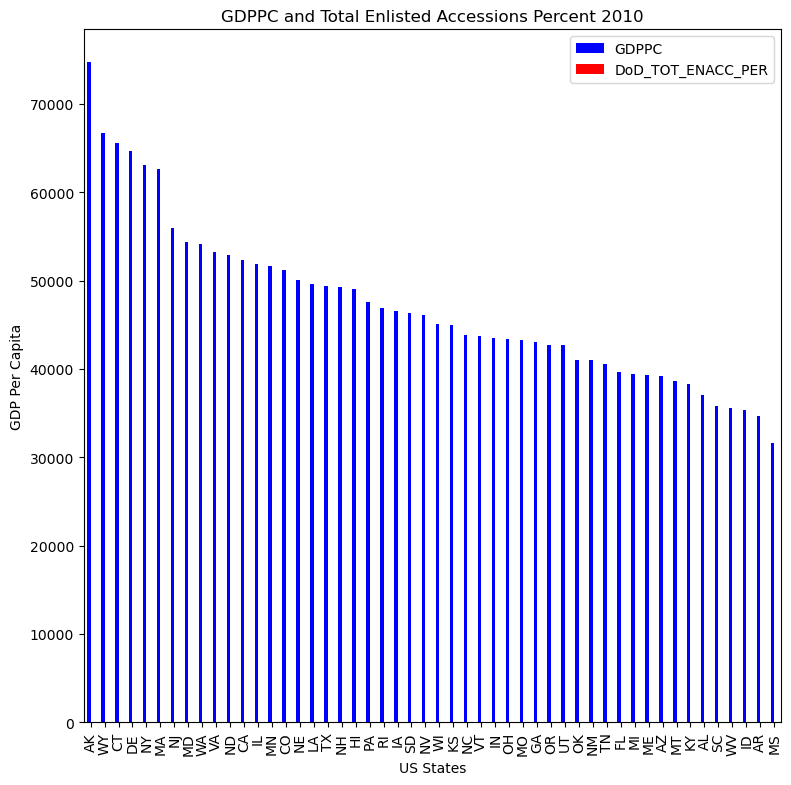

In [41]:
colors = ['blue', 'red']
df_2010_gdppc_orderedv0 = pd.DataFrame(df_2010_gdppc_orderedv0, columns=['ST_AB', 'GDPPC', 'DoD_TOT_ENACC_PER'])

df_2010_gdppc_orderedv0.plot(x='ST_AB', y=['GDPPC', 'DoD_TOT_ENACC_PER'], kind = 'bar', color = colors, figsize = (9,9))

plt.xticks(rotation = 90)
plt.xlabel('US States')
plt.ylabel('GDP Per Capita')
plt.title('GDPPC and Total Enlisted Accessions Percent 2010')
plt.show()

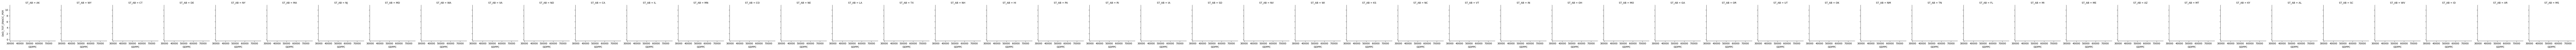

In [45]:
g = sns.FacetGrid(df_2010_gdppc_orderedv0, col = 'ST_AB')
g.map(sns.lineplot, 'GDPPC', 'DoD_TOT_ENACC_PER');

In [46]:
df_2010_top6 = df_2010_gdppc_orderedv0.head(6)

In [47]:
df_2010_top6

,ST_AB,GDPPC,DoD_TOT_ENACC_PER
1,AK,74696.000740,0.26
49,WY,66746.910267,0.26
6,CT,65573.807134,0.75
7,DE,64651.468854,0.24
31,NY,63068.684279,4.10
20,MA,62611.719592,1.40


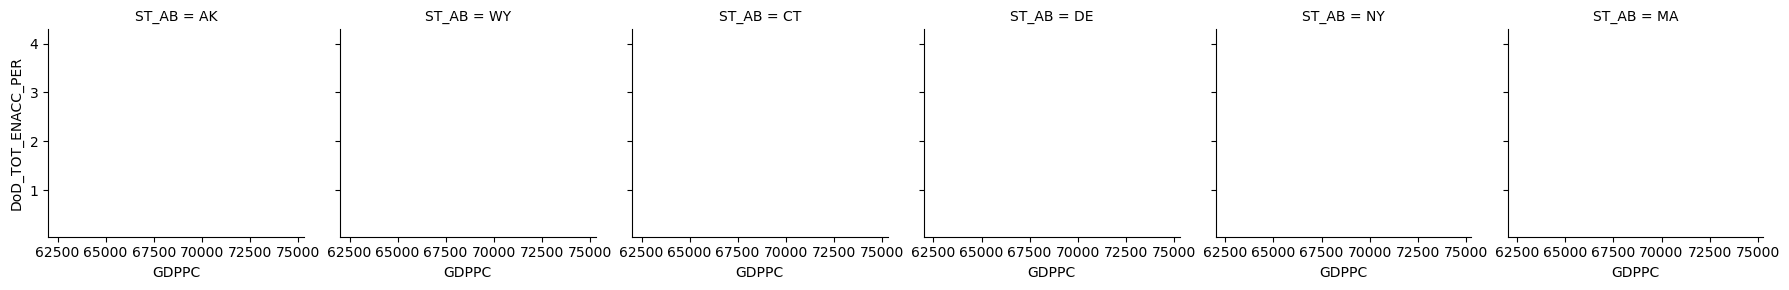

In [48]:
g = sns.FacetGrid(df_2010_top6, col = 'ST_AB')
g.map(sns.lineplot, 'DoD_TOT_ENACC_PER', 'GDPPC');

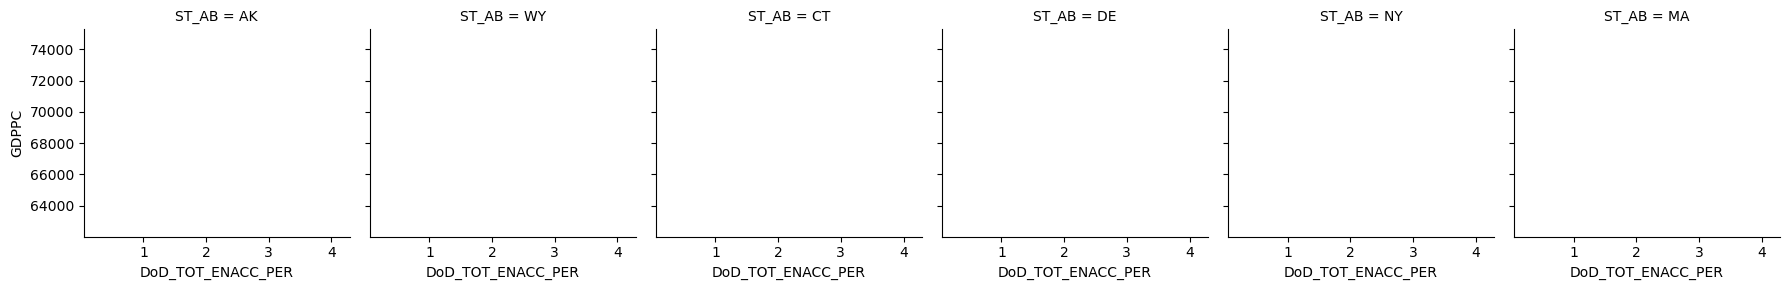

In [49]:
g = sns.FacetGrid(df_2010_top6, col = 'ST_AB')
g.map(sns.lineplot, 'DoD_TOT_ENACC_PER', 'GDPPC');

In [ ]:
g = sns.FacetGrid(df_2010_top6, col = 'ST_AB')
g.map(sns.lineplot, 'GDPPC');

In [51]:
df.head()

,STATE,ST_AB,YEAR,GDP,POP_EST,GDPPC,DoD_TOT_ENACC,DoD_TOT_ENACC_PER
0,Alabama,AL,2010,1.772492e+11,4785514,37038.696366,3029,1.90
1,Alaska,AK,2010,5.333160e+10,713982,74696.000740,412,0.26
2,Arizona,AZ,2010,2.511530e+11,6407342,39197.689151,3840,2.50
3,Arkansas,AR,2010,1.014865e+11,2921998,34731.885511,1522,1.00
4,California,CA,2010,1.954093e+12,37319550,52361.100281,17386,11.10


In [ ]:
fig, ax = plt.subplots(figsize = (15, 15), nrows=5, ncols=);

In [ ]:
#https://medium.com/analytics-vidhya/an-introduction-to-subplots-in-matplotlib-b8b4821b47d1

In [42]:
df_2010_gdppc_orderedv1 = df_2010_gdppc_ordered[['ST_AB', 'GDPPC', 'DoD_TOT_ENACC']]

In [43]:
df_2010_gdppc_orderedv1.head(2)

,ST_AB,GDPPC,DoD_TOT_ENACC
1,AK,74696.000740,412
49,WY,66746.910267,399


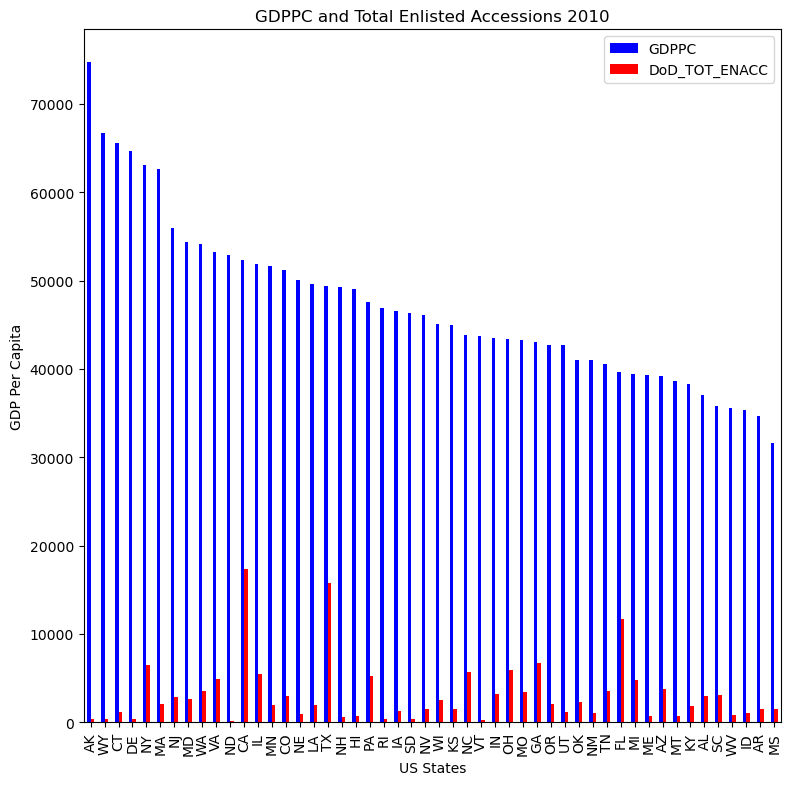

In [44]:
colors = ['blue', 'red']
df_2010_gdppc_orderedv1 = pd.DataFrame(df_2010_gdppc_orderedv1, columns=['ST_AB', 'GDPPC', 'DoD_TOT_ENACC'])

df_2010_gdppc_orderedv1.plot(x='ST_AB', y=['GDPPC', 'DoD_TOT_ENACC'], kind = 'bar', color = colors, figsize = (9,9))

plt.xticks(rotation = 90)
plt.xlabel('US States')
plt.ylabel('GDP Per Capita')
plt.title('GDPPC and Total Enlisted Accessions 2010')
plt.show()